<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Reduccion_de_la_varianzaII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reducción de la varianza**
## Variables de control

Queremos estimar el parámetro $ \theta $ mediante la variable X y contamos con otra variable Y, con $ E[Y] = μ_y $ y usamos

$$ Z = X + c(Y - μ_y ), \quad \text{donde c es cierta constante} $$

Sabemos que $ E[Z] = E[X] $ y tenemos que $ Var(Z) = Var(X) + 2c Cov(X,Y) + c^2 Var(Y) $


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import time

En el ejemplo tenemos que estimar
$$ I = \int_{0}^{1} \frac{1}{1+x^2} dx $$

In [4]:
def g(x):
  return 1 / (1+x**2)

Uttilizamos el Monte Carlo crudo y la variable

$$ X = \frac{ \frac{1}{1+u_1^2} + \frac{1}{1+u_2^2} + ⋯ + \frac{1}{1+u_n^2} }{n}, \quad u_{i} \thicksim U(0,1), \quad i=1,2,...,n $$

Podemos usar como variable de control

$$ Y = \frac{U_1 + U_2 + ⋯ + U_n}{n} $$

entonces

$$ Cov(X,Y) = \frac{1}{N^2} \sum_{i=1}^{N} Cov(g(U_i), U_i) \quad → \quad Cov(X,Y) = \frac{1}{N} Cov(g(U), U) \quad U \thicksim U(0,1) $$
\\

Primero tenemos nuestro codigo del metodo de Monte Carlo crudo (el que ya hemos ocupado anteriormente)

In [11]:
def mc_crudo(N, n, func=g, a=0.0, b=1.0):
  thetas = []
  t0 = time.perf_counter()
  for _ in range(n):
      suma = 0.0
      for _ in range(N):
        u = rd.random()
        x = a + u * (b - a)
        suma += func(x)
      theta2 = (b - a) / N * suma
      thetas.append(theta2)
  t1 = time.perf_counter()
  tiempo_promedio = (t1 - t0) / n
  return np.mean(thetas), np.var(thetas), tiempo_promedio

De la parte teorica, lo que vamos a tener despues de hacer los calculos es que

$$ Cov(X,Y) = \frac{ \frac{log(2)}{2} - \frac{\pi}{8} }{n}  $$

y asi,

$$ c = -12 (\frac{log(2)}{2} - \frac{\pi}{8}) $$


In [7]:
cov = 0.5 * np.log(2) - np.pi / 8 # Cálculo teórico de Cov(f(U),U)
print("Cov(f(U), U) =", cov)

c = -12 * cov  # Constante c
print("Constante óptima c* =", c_star)

EY = 0.5 # Valor esperado de Y

Cov(f(U), U) = -0.046125491418751496
Constante óptima c* = 0.553505897025018


Ahora si, veamos como quedaria el método de Monte Carlo con la variable de control, usando la misma sinulacion que el método crudo pero con la Z

In [8]:
def mc_crudo_control(N, n, func=g, a=0.0, b=1.0, c=c, EY=0.5):
    thetas = []
    t0 = time.perf_counter()
    for _ in range(n):
        suma_g = 0.0
        suma_u = 0.0
        for _ in range(N):
            u = rd.random()
            x = a + u * (b - a)
            suma_g += func(x)
            suma_u += u
        X = (b - a) * (suma_g / N)     # estimador crudo
        Y = suma_u / N                 # variable de control
        Z = X + c * (Y - EY)           # estimador ajustado
        thetas.append(Z)
    t1 = time.perf_counter()
    tiempo_promedio = (t1 - t0) / n
    return np.mean(thetas), np.var(thetas), tiempo_promedio

In [12]:
N = 1000
n = 200

mean_X, var_X, t_X = mc_crudo(N, n)
mean_Z, var_Z, t_Z = mc_crudo_control(N, n)

In [13]:
print("Monte Carlo crudo:                                       media =", mean_X, " varianza =", var_X, " tiempo =", t_X)
print("Monte Carlo crudo con reduccion de varianza:             media =", mean_Z, " varianza =", var_Z, " tiempo =", t_Z)

Monte Carlo crudo:                                       media = 0.7858679151625381  varianza = 2.4335015304578412e-05  tiempo = 0.00046379009499986524
Monte Carlo crudo con reduccion de varianza:             media = 0.7853458709530748  varianza = 3.245950693565769e-07  tiempo = 0.000522924059999923


Para ver en cuento se redujo la varianza ocupamos lo siguiente

$$ \text{Reduccion} = \frac{ \text{Varianza Original} - \text{Varianza Nueva} }{ \text{Varianza Original} } * 100 $$

In [15]:
reduccion=((var_X-var_Z)/var_X)*100
print("Reduccion de la varianza: ", reduccion, "%")

Reduccion de la varianza:  98.66613985940043 %


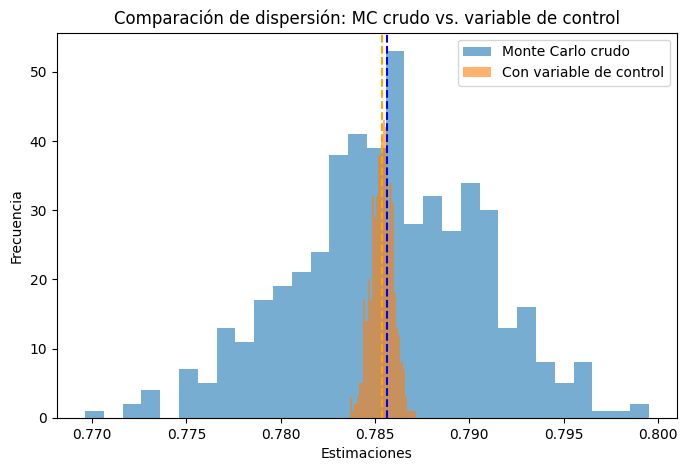

In [18]:
Xs = []
Zs = []

for _ in range(n):
    suma_g = 0
    suma_u = 0
    for _ in range(N):
        u = rd.random()
        suma_g += g(u)
        suma_u += u
    X = suma_g / N
    Y = suma_u / N
    Z = X + c * (Y - EY)
    Xs.append(X)
    Zs.append(Z)

plt.figure(figsize=(8,5))
plt.hist(Xs, bins=30, alpha=0.6, label="Monte Carlo crudo")
plt.hist(Zs, bins=30, alpha=0.6, label="Con variable de control")
plt.axvline(np.mean(Xs), color='blue', linestyle='--')
plt.axvline(np.mean(Zs), color='orange', linestyle='--')
plt.xlabel("Estimaciones")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Comparación de dispersión: MC crudo vs. variable de control")
plt.show()